Preview of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

The datas

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

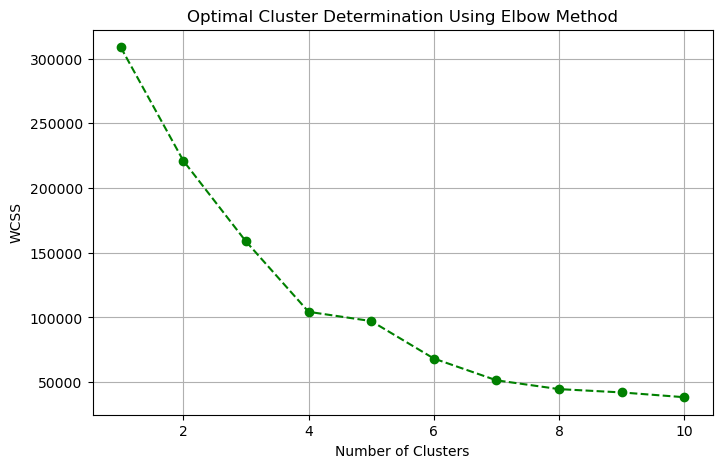

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


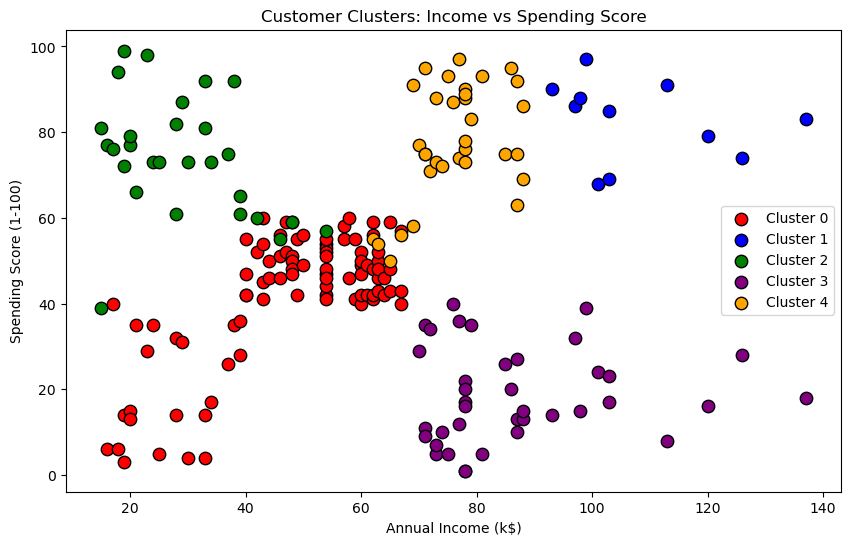

Enter customer age:  46
Enter annual income (in k$):  46666
Enter spending score (1-100):  52


The new customer belongs to Cluster 1.


In [1]:
# Importing essential libraries
import pandas as pd       # For handling and analyzing data
import numpy as np        # For numerical calculations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.cluster import KMeans  # For K-Means clustering

# Load customer dataset
customer_data = pd.read_csv("Mall_Customers.csv")

# Quick look at the dataset
print("Preview of the dataset:")
print(customer_data.head())

# Summary of dataset details
print("\nDataset Information:")
customer_data.info()

# Dimensions of the dataset
rows, columns = customer_data.shape
print(f"\nThe dataset contains {rows} rows and {columns} columns.")

# Check for missing values
missing_values = customer_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Selecting key features for clustering
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS)
cluster_scores = []

# Compute WCSS for different numbers of clusters (1 to 10)
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    kmeans_model.fit(features)
    cluster_scores.append(kmeans_model.inertia_)

# Visualize the Elbow Method to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), cluster_scores, marker="o", linestyle='--', color='green')
plt.title('Optimal Cluster Determination Using Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Implement KMeans clustering with the chosen number of clusters
optimal_clusters = 5
final_kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
predicted_clusters = final_kmeans.fit_predict(features)

# Add cluster assignments to the original dataset
customer_data['Assigned Cluster'] = predicted_clusters

# Plot clusters based on Annual Income and Spending Score
plt.figure(figsize=(10, 6))

cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']
for cluster_id in range(optimal_clusters):
    cluster_points = customer_data[customer_data['Assigned Cluster'] == cluster_id]
    plt.scatter(cluster_points['Annual Income (k$)'], cluster_points['Spending Score (1-100)'], 
                color=cluster_colors[cluster_id], label=f'Cluster {cluster_id}', edgecolor='black', s=80)

plt.title('Customer Clusters: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Accept new customer details as input
input_age = float(input("Enter customer age: "))
input_income = float(input("Enter annual income (in k$): "))
input_spending = float(input("Enter spending score (1-100): "))

# Predict the cluster for the new customer
new_customer = pd.DataFrame({'Age': [input_age], 'Annual Income (k$)': [input_income], 'Spending Score (1-100)': [input_spending]})
predicted_cluster = final_kmeans.predict(new_customer)[0]

# Display the cluster for the new customer
print(f"The new customer belongs to Cluster {predicted_cluster}.")
